# The TMDb movie data investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   This dataset contains information about movies collected from The Movie Database (TMDb) containing columns like popularity ratings, budget, revenue, Title, cast, movie director, overview, runtime, genre, production companies, release date, release year. it also contains two columns, budget_adj and revenue_adj showing the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Research questions
1. What are the top 10 movies with the most expensive budgets?
2. What year had the movies with the highest ratings?
3. Has the general budget for movies been increasing in recent times?
4. Is there a relationship between movie budgets and popularity ratings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### Data inspection

In [2]:
# Loading of dataset, dataset should be loaded from personal directory
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


The dataset was inspected and concluded that not all columns would be important for the analysis

In [3]:
# checking the number of rows and columns
df.shape

(10866, 21)

The dataset has 10866 rows and 21 columns

In [4]:
#Checking general info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

This shows that some columns had null values

In [5]:
#Checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

This shows the number of null values

In [6]:
# checking for duplicated values
df.duplicated().sum()

1

one duplicated entry was found

#### Dropping duplicated entries

In [7]:
# Dropping the duplicated entry
df.drop_duplicates(inplace=True)

In [8]:
# Checking for duplicated entries
df.duplicated().sum()

0

#### Dropping columns not needed for analysis

In [9]:
#Checking the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
#dropping the columns
df.drop(['id', 'imdb_id', 'budget', 'revenue','cast','homepage', 
         'director', 'tagline', 'keywords', 'overview','runtime',
         'genres', 'production_companies', 'vote_count', 'vote_average',
         'release_date'], axis=1, inplace=True)

In [11]:
#Inspecting dataframe
df.head()

,popularity,original_title,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,2015,1.747999e+08,1.385749e+09


#### Dropping entries with null values

In [12]:
df.isnull().sum()

popularity        0
original_title    0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

No null values in the dataset being used for analysis

#### General description of variables

In [13]:
# General description of variables
df.describe()

,popularity,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,12.813260,3.430753e+07,1.446383e+08
min,0.000065,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,2015.000000,4.250000e+08,2.827124e+09


This shows the minimum, maximum and mean values for the various variables

In [14]:
#Number of years recorded
df['release_year'].nunique()

56

56 years of movies information has been recorded 

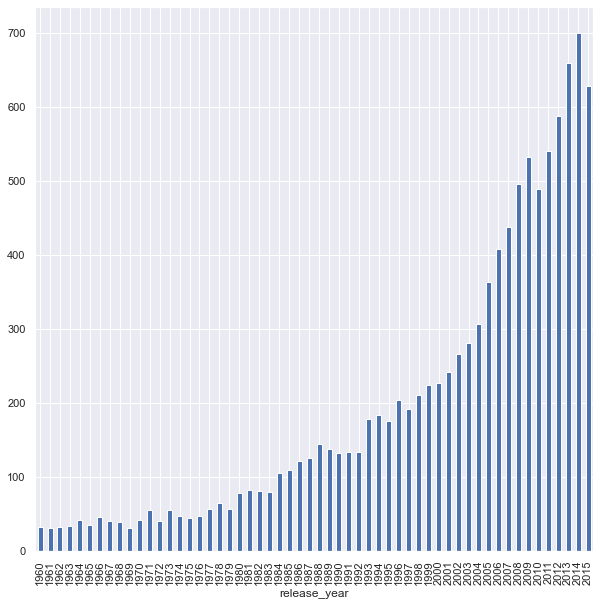

In [15]:
# Number of movies released each year
df['release_year'].groupby(df['release_year']).count().plot(kind='bar', figsize=(10,10));

The number of movies released per year have increased over the years

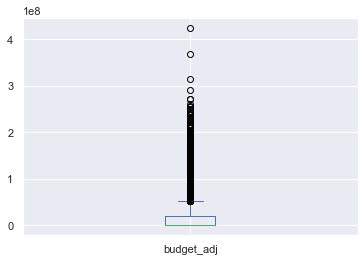

In [16]:
#Distribution of movie budgets
df['budget_adj'].plot(kind='box');

Shows that majority of movies in the database had a budget of zero dollars, with outliers of movies with more expensive budgets stretching outwards

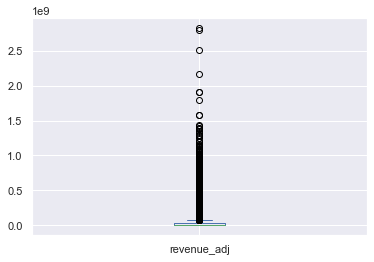

In [17]:
#Distribution of revenue from movies
df['revenue_adj'].plot(kind='box');

Shows that majority of movies in the database had a revenue of zero dollars, but less than that of the budgets, showing that some movies with zero budgets gained revenue.

<a id='eda'></a>
## Exploratory Data Analysis

### What are the top 10 movies with the most expensive budgets?

In [18]:
# Finding the top ten movies with the most expensive budgets
Top_ten = df.sort_values('budget_adj', ascending=False, ignore_index=True).head(10).iloc[:,np.r_[1,3]]
Top_ten

,original_title,budget_adj
0,The Warrior's Way,4.250000e+08
1,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
2,Pirates of the Caribbean: At World's End,3.155006e+08
3,Superman Returns,2.920507e+08
4,Titanic,2.716921e+08
5,Spider-Man 3,2.713305e+08
6,Tangled,2.600000e+08
7,Avengers: Age of Ultron,2.575999e+08
8,Harry Potter and the Half-Blood Prince,2.541001e+08
9,Waterworld,2.504192e+08


In [19]:
#Creating a function for plotting
def ploty (df,x,y,kind,figsize,title):
    df.plot(x=x, y=y, kind=kind, figsize=figsize,color='b' )
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.title(title, fontsize=18)

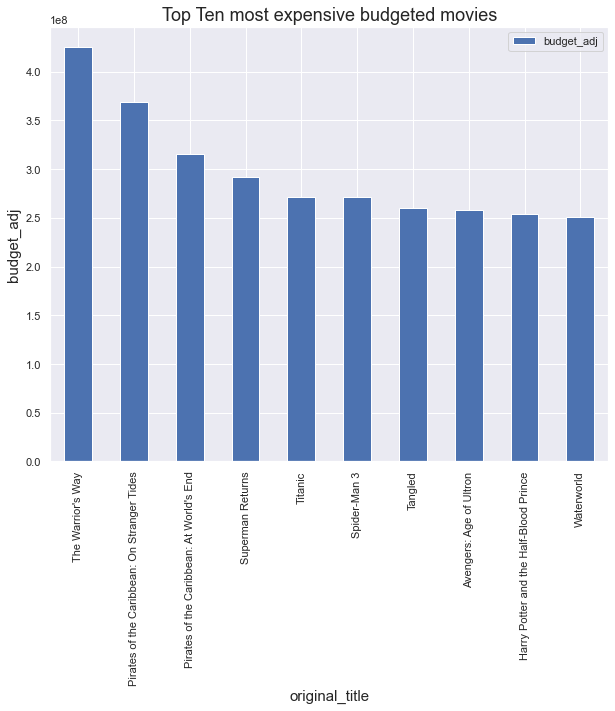

In [20]:
# Plotting a bar chart showing the top ten movies with the most expensive budgets
ploty (Top_ten,'original_title','budget_adj','bar',(10,8),'Top Ten most expensive budgeted movies')

This shows the top 10 movies with the most expensive budgets

### What year had the movies with the highest average ratings?

In [21]:
# Average ratings for movies for each year
avg_ratings = df.groupby('release_year',as_index=False).mean().iloc[:,:2]

In [22]:
# Year with the highest Average ratings
avg_ratings.sort_values('popularity',ascending=False).iloc[:,:2].head(1)

,release_year,popularity
55,2015,1.030657


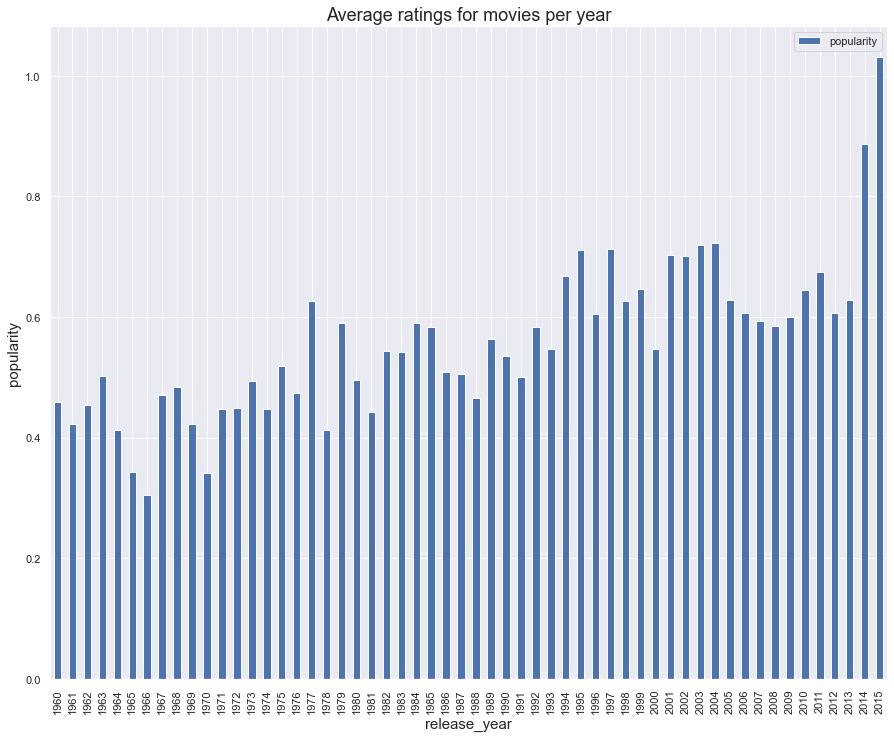

In [23]:
#Plotting a bar chart for average ratings of movies per year
ploty (avg_ratings,'release_year','popularity','bar',(15,12),'Average ratings for movies per year')

This shows that the year 2015 had the highest average ratings for movies

### Has the general budget for movies increased over the recent years?

In [24]:
# Average budgets of movies per year in the recent years
avg_budget = df.groupby('release_year',as_index=False).mean().iloc[:, np.r_[0,2]].tail(15)
avg_budget

,release_year,budget_adj
41,2001,2.871069e+07
42,2002,2.686408e+07
43,2003,2.632182e+07
44,2004,2.696341e+07
45,2005,2.252539e+07
46,2006,1.936979e+07
47,2007,1.833353e+07
48,2008,1.588863e+07
49,2009,1.638843e+07
50,2010,1.913088e+07


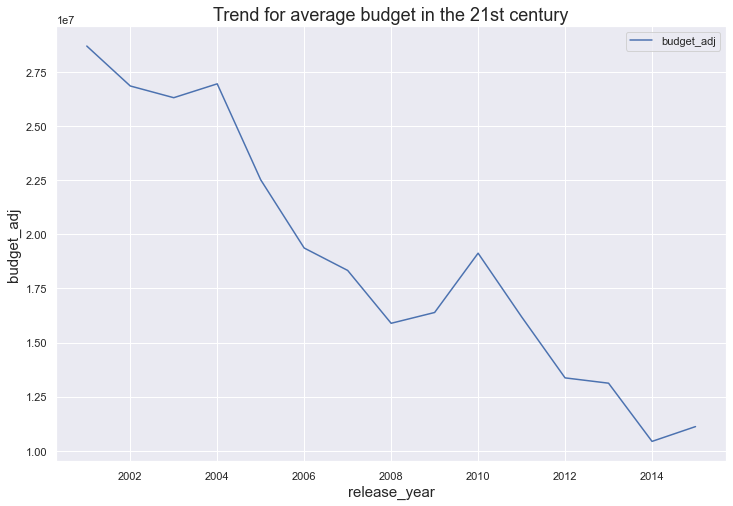

In [25]:
# Plotting a line chart for average of movie budgets in the recent years
ploty (avg_budget,'release_year','budget_adj','line',(12,8),'Trend for average budget in the 21st century')

This shows that the general average budget for movies has declined yearly

### Are more expensive budgeted movies rated better?

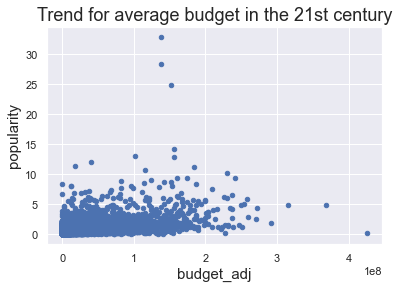

In [26]:
#Plotting a scatterplot of popularity against budget
bud_rate = df.iloc[:,np.r_[0,3]]
ploty (bud_rate,'budget_adj','popularity','scatter',(6,4),'Trend for average budget in the 21st century')

This shows that there is no correlation between movies budgets and their ratings

<a id='conclusions'></a>
## Conclusions

From my exploratory data analysis of the TMDb movie dataset, the following conclusions where gotten;
1. The warrior's way is the most expensive budgeted movie recorded as of 2015
2. The latest year which is the year 2015, had the highest average ratings, this could mean that 2015 had the best movies leading to the highest average ratings, it could also imply that rating systems had increased overtime, leading more people to be involved in the rating sytems, further analysis would be needed to conclude.
3. Contray to popular belief, the average money spent for budgets of movies yearly in recent times has actually been declining, this could be due to improvement in technology or other factors, further analysis would be needed to conclude.
4. From my analysis, there seems to be no correlation between expensive budgets and popularity ratings. We would expect that expensive movies, tend to be better movies because of attention to details, thereby having higher ratings, futher analysis would be needed to conclude.

### LIMITATIONS

1. This was an exploratory data analysis of the TMDb movie dataset, it was used to get a general idea of the data we were working with, therefore conclusive results could not be made. 
2. Causal relationship between variables could not be confirmed from this analysis. Further statistical tests would be needed for better conclusions and actionable insights